In [ ]:
# !pip install tensorflow
# https://towardsdatascience.com/build-your-first-image-classifier-with-convolution-neural-network-cnn-b4e9034ec5cb
# https://keras.io/api/datasets/fashion_mnist/

In [ ]:
import os
for dirname, _, filenames in os.walk('models'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# importing libraries
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

We will be using the MNIST database from Keras to train the model to classify handwritten digits. MNIST database consists of black and white images of handwritten digits of size 28x28. Let us start by importing and visualizing the dataset. Additionally, we are also normalizing the data by simply dividing the entire dataset by 255. This is because of the values in the dataset range from 0 to 255. Normalization is done to bring the entire dataset to a common scale.

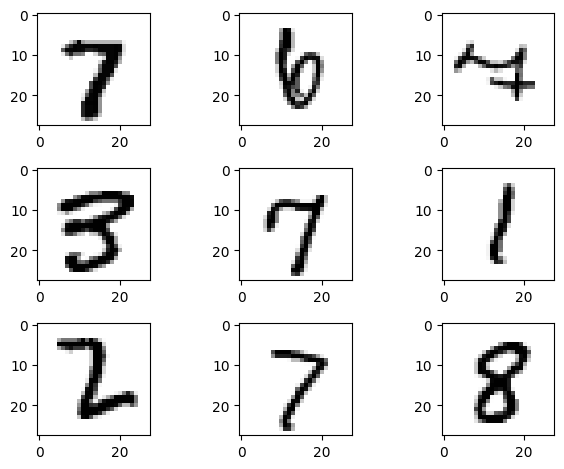

In [40]:
'''
loading the dataset
'''
(train_X, train_y), (val_X, val_y) = mnist.load_data()

'''
normalizing the dataset
'''
train_X, val_X = train_X/255, val_X/255

'''
visualizing 9 rndom digits from the dataset
'''
for i in range(331,340):
    plt.subplot(i)
    a = np.random.randint(0, train_X.shape[0], 1)
    plt.imshow(train_X[a[0]], cmap = plt.get_cmap('binary'))

plt.tight_layout()
plt.show()

#### Our model will contain three sets of convolution and pooling layers and 2 fully connected layers.

The “filters” parameter defines a convolution layer's depth: the number of feature maps stacked together to make one convolution layer. We are using kernel size 3x3, the activation function for all the layers except the last layer is set as relu, short for rectified linear activation function. I am using softmax activation for the last dense layer, which basically gives the probability distribution of each class, and the correct class can be predicted based on its probability. You can learn more about activation functions from Keras documentation linked “here.” Please note that only the first layer requires the “input_shape” parameter. This has to be the size of the input. In this case, the input_shape parameter is (28,28,1), which is the input image size. The “units” parameter in the dense layer is the number of nodes. The number of units in the last layer must be essentially equal to the number of output classes. In our case, the number of output classes is 10 (0 to 9).



In [41]:
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten


# defining function for building the model

def create_model(input_shape = (28,28,1)):

  model = keras.Sequential([
      layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
      layers.MaxPool2D(pool_size = 2), 

      layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
      layers.MaxPool2D(pool_size = 2),

      layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
      layers.MaxPool2D(pool_size = 2),


      layers.Flatten(),
      layers.Dense(units = 54, activation = 'relu'),
      layers.Dense(units = 10, activation = 'softmax')
      ])

  return model
 



We have defined a function to build the model and compile the model.

In [43]:
def compile_model(model, optimizer = 'adam', loss = 'categorical_crossentropy'):
  model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

We have defined a function to train the model. In the below code, “epochs” is the number of passes the algorithm goes through the entire dataset. “x” and “y” is the training dataset and the corresponding labels.

In [44]:
def fitting_model(model, x, y, epoch):
  model.fit(x, y, shuffle = True, epochs = epoch)

Let’s sum up all the three bits (building, compiling, and training) by calling each of the respective functions with suitable arguments. Before feeding the dataset to the model, we will have to perform some minor data preprocessing. The input data in MNIST is of 28x28 shape. However, a grayscale image is of 28x28x1 shape. Therefore, we will have to reshape training and testing data to 28x28x1. Also, the labels of the numbers stored in train_y and val_y variables are numerical. The numbers must be treated as categorical as we have 10 distinct classes (0 to 9). Therefore we will be encoding the labels to binary; for example, 0 will be encoded as [0,0,0,0,0,0,0,0,0], 1 will be encoded as [1,0,0,0,0,0,0,0,0], 2 as [0,1,0,0,0,0,0,0,0] and so on.

In [45]:
# reshaping the independent variables
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
val_X = val_X.reshape(val_X.shape[0], 28, 28, 1)

# encoding the dependent vairable
train_y = np.eye(10)[train_y]
val_y = np.eye(10)[val_y]

# creating model
model = create_model((28, 28, 1))

# optimizing model
compile_model(model, 'adam', 'categorical_crossentropy')

# training model
history = model.fit(train_X, train_y, validation_data = (val_X, val_y), batch_size =150, epochs = 80)
model.save('models/cnn_digitclass.model')


Epoch 1/80
400/400 [==============================] - 5s 8ms/step - loss: 0.2357 - accuracy: 0.9297 - val_loss: 0.0527 - val_accuracy: 0.9827
Epoch 2/80
400/400 [==============================] - 3s 8ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0345 - val_accuracy: 0.9885
Epoch 3/80
400/400 [==============================] - 3s 6ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 4/80
400/400 [==============================] - 2s 6ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0271 - val_accuracy: 0.9905
Epoch 5/80
400/400 [==============================] - 2s 6ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 6/80
400/400 [==============================] - 3s 7ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 7/80
400/400 [==============================] - 3s 8ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0247 - val_accuracy: 0.9915
Epoch 

### The model is trained, and the below plot shows it's performing pretty well.

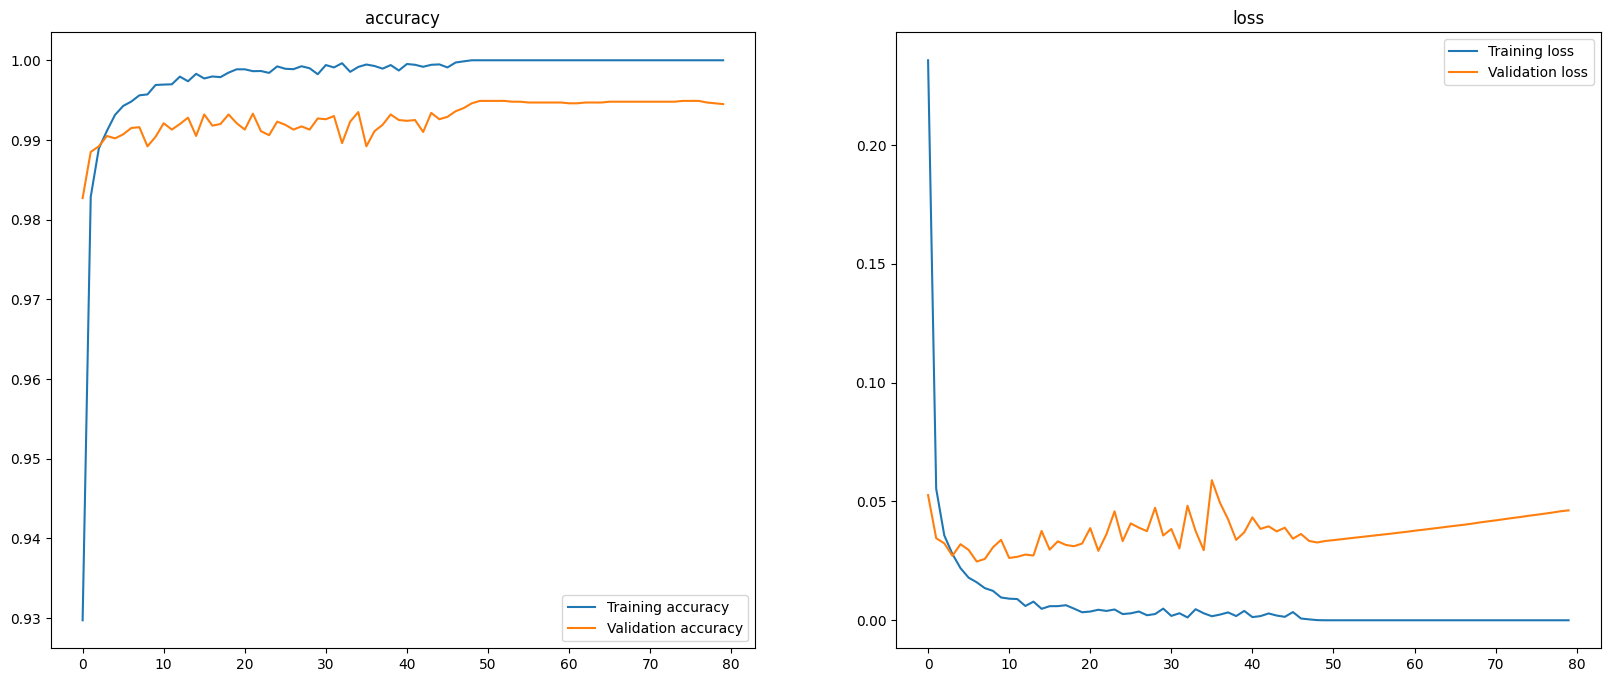

In [46]:
#model performance visualization
f = plt.figure(figsize=(20,8))

#accuracy
plt1 = f.add_subplot(121)
plt1.plot(history.history['accuracy'], label = str('Training accuracy'))
plt1.plot(history.history['val_accuracy'], label = str('Validation accuracy'))
plt.legend()
plt.title('accuracy')

#loss
plt2 = f.add_subplot(122)
plt2.plot(history.history['loss'], label = str('Training loss'))
plt2.plot(history.history['val_loss'], label = str('Validation loss'))
plt.legend()
plt.title('loss')

plt.show()

To test the model practically, I scribbled a digit on a piece of paper, processed the image using OpenCV to make it consistent with the images we used to train our model, and passed it through the model.

In [47]:
#importing and processing input image
import cv2

img = cv2.imread("data/test_images_data/sample_8_img.png") #loading input image
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA) #resizing to input shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #chaging to grayscale format
img = cv2.bitwise_not(img) #the color scale was inverted, correcting inverted color scale
img = cv2.Canny(img, 50, 50) # removing noise

predict_data = np.array([img])/255 #changing image data to array
predict_data = predict_data.reshape(1,28, 28, 1) #reshaping to input shape

#predicting the input 
from tensorflow.keras import models
model = models.load_model('models/cnn_digitclass.model') #loading pre-savedd model
prediction = model.predict(predict_data) #gives array
predicted_number = np.argmax(prediction) #extracts predicted number


1/1 [==============================] - 0s 114ms/step


In [53]:
print(f'Prediction: \n {img}')

Prediction: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255   0 255   0 255 255   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255   0 255   0   0   0   0   0 255 255
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0 255   0   0 255 255   0   0   0
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0 255   0   0   0   0   0 255 255   0
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0 255   0   0   0   0   0   0 255   0
    0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0 255   0 

In [55]:
print(f'Model: {model.summary()}')
print(f'Prediction: {prediction}')


print(f'Predicted Number: {predicted_number}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       